# Linear functions

## Linear functions

In [1]:
import numpy as np

**Functions in Python.** Python provides several methods for defning functions. One simple way is to use lambda functions. A simple function given by an expression such as $f(x) = x_{1} + x_{2} - x_{4}^2$ can be defned in a single line.

In [2]:
f = lambda x: x[0] + x[1] - x[3]**2
f([-1,0,1,2])

-5

**Superposition.** Suppose a is an n-vector. The function $f(x) = a^T x$ is linear, which means that for any n-vectors x and y, and any scalars $\alpha$ and $\beta$, the superposition equality
$$f(\alpha x + \beta y) = \alpha f(x) + \beta f(y)$$
holds. Superposition says that evaluating f at a linear combination of two vectors is the same as forming the linear combination of f evaluated at the two vectors.
</br>
Let's define the inner product function f for a specific value of a, and then verify superposition in Python for specific values of x, y, $\alpha$, and $\beta$. (This check does not show that the function is linear. It simply checks that superposition holds for these specific values.)

In [3]:
a = np.array([-2,0,1,-3])
x = np.array([2,2,-1,1])
y = np.array([0,1,-1,0])
alpha = 1.5
beta = -3.7
LHS = np.inner(alpha*x + beta*y, a)
RHS = alpha*np.inner(x,a) + beta*np.inner(y,a)
print(f'LHS: {LHS}')
print(f'RHS: {RHS}')

LHS: -8.3
RHS: -8.3


For the function $f(x) = a^T x$, we have $f(e_3) = a_3$. Let's check that this holds in our example.

In [4]:
a = np.array([-2,0,1,-3])
e3 = np.array([0,0,1,0])
a3 = e3 @ a
print(a3)

1


**Examples.** Let's define the average function in Python and check its value of a specific vector. (Numpy also contains an average function, which can be called with np.mean.

In [5]:
avg = lambda x: sum(x)/len(x)
x = [1,-3,2,-1]
avg(x)

-0.25

In [6]:
x = np.array([1,-3,2,-1])
np.mean(x)

-0.25

## Taylor approximation

**Taylor approximation.** The (first-order) Taylor approximation of function $f : R^n \rightarrow R$, at the point *z*, is the affine function $\hat{f}(x)$ given by $$\hat{f}(x) = f(z) + \nabla f(z)^T (x - z)$$ For x near z, $\hat{f}(x)$ is very close to $f(x)$. Let's try a numerical example (see page 36 of textbook) using Python.

In [7]:
f = lambda x: x[0] + np.exp(x[1] - x[0])
grad_f = lambda z: np.array([1 - np.exp(z[1] - z[0]), np.exp(z[1] - z[0])])
#Taylor approximation
f_hat = lambda x: f(z) + grad_f(z) @ (x - z)

In [11]:
z = np.array([1,2])
x = np.array([2,3])
f(x), f_hat(x)

(4.718281828459045, 4.718281828459045)

## Regression model

**Regression model.** The regression model is the afine function of $x$ given by $f(x) = x^T\beta + v$, where the n-vector $\beta$ and the scalar $v$ are the parameters in the model. The
regression model is used to guess or approximate a real or observed value of the number $y$ that is associated with $x$ (We'll see later how to find the parameters in a regression model using data).

Let's define the regression model for house sale price described on page 39 of VMLS, and compare its prediction to the true house sale price $y$ for a few values of $x$.

In [34]:
# parameters in regression model
beta = np.array([148.73, -18.85])
v = 54.40
y_hat = lambda x: x @ beta + v
#Evaluate regression model prediction
x = np.array([0.846, 1])
y = 115
y_hat(x), y

(161.37557999999999, 115)

In [35]:
x = np.array([1.324, 2])
y = 234.50
y_hat(x), y

(213.61852000000002, 234.5)

Our first prediction is pretty bad; our second one is better. A scatter plot of predicted and actual house prices (Figure 2.4 of VMLS) can be generated as follows. We use the house_sales_data data set to obtain the vector price, areas, beds (see Appendix B). The data sets we used in this Python language companion can be found on: https://github.com/jessica-wyleung/VMLS-py. You can download the jupyter
notebook from the repository and work on it directly or you can copy and paste the data set onto your own jupyter notebook.

In [36]:
from house_price import house_sales_data
import matplotlib.pyplot as plt

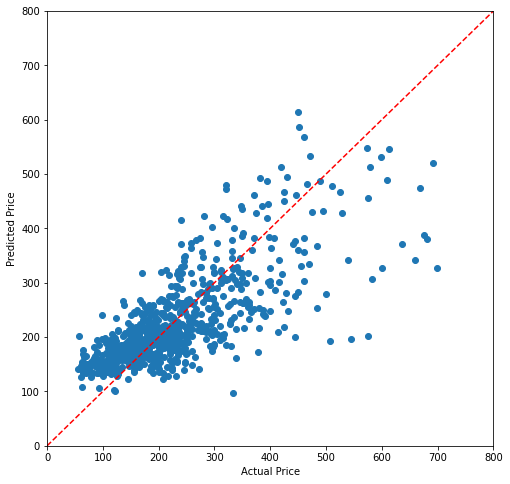

In [42]:
plt.ion()
plt.rcParams["figure.figsize"] = (8,8)
D = house_sales_data()
price = D['price']
area = D['area']
beds = D['beds']
v = 54.4017
beta = np.array([147.7251, -18.8534])
predicted = v + beta[0]*area + beta[1]*beds
plt.scatter(price, predicted)
plt.plot((0,800),(0,800) ,ls='--', c ='r')
plt.ylim(0,800)
plt.xlim(0,800)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

(0.0, 100.0)

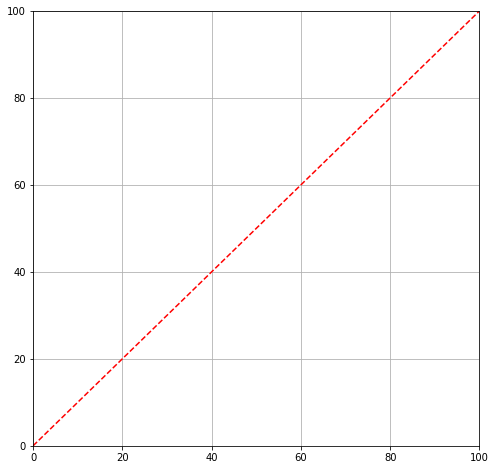

In [54]:
plt.plot([0,100], [0,100],ls='--', c ='r')
plt.grid()
plt.ylim(0,100)
plt.xlim(0,100)